## Ejemplo Decision Tree MNIST
<div style="border-style:groove;border-width:thin;padding:10px">
MNIST es un dataset de 70000 dígitos numéricos escritos a mano por empleados del censo y por estudiantes de instituto de EEUU. Para poder trabajar con él, las imágenes están digitalizadas y reducidas a 28x28 pixels en blanco y negro. El objetivo de esta actividad es entrenar un modelo de clasificación que consiga determinar de que número se trata en función de los 784 datos de entrada (28x28). Cada pixel se trata como una entrada al sistema. La salida será el número del 0 al 9 que identifica. 
    </div>

<div style="border-style:groove;border-width:thin;padding:10px">
A continuación vamos a importar el dataset y a generar los conjuntos X e y.
    </div>

In [75]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()



dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [76]:
X, y = mnist["data"], mnist["target"]
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


<div style="border-style:groove;border-width:thin;padding:10px">
Ahora vamos a coger una muestra cualquiera y a pintarlo. Los datos están como un array de una dimensión y 784 valores. Hay que cambiarlos a un array de dos dimensiones de 28x28 para poder pintarlo como una imagen. 
    </div>

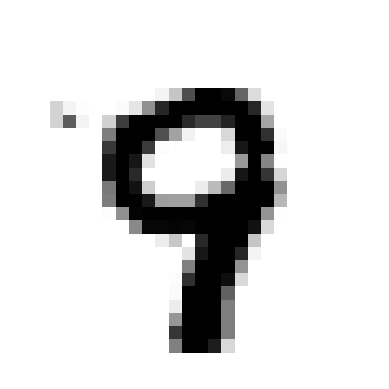

9


In [77]:
import matplotlib as mpl
import matplotlib.pyplot as plt

random = 6999

some_digit = X.iloc[[random]].values
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

print(y[random])

In [78]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


<div style="border-style:groove;border-width:thin;padding:10px">
Es tu turno! Trata de resolver el problema con un árbol de decisión siguiendo los pasos que se indican a continuación:
    </div>

In [79]:
# =========================================================
# CLASIFICACIÓN MNIST CON ÁRBOL DE DECISIÓN (VERSIÓN SIMPLE)
# =========================================================

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 1. CARGA DE DATOS
# Descargamos el dataset MNIST. X contiene los píxeles e y las etiquetas (0-9).
print("Cargando imágenes de MNIST...")
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"]

# 2. DIVISIÓN DE DATOS (Train/Test)
# Usamos el 80% para enseñar al modelo y el 20% para ponerlo a prueba.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. CONFIGURACIÓN Y ENTRENAMIENTO
# Creamos el árbol. max_depth=12 es un buen equilibrio para no sobrecargar la memoria.
print("Entrenando el modelo (esto puede tardar unos segundos)...")
modelo = DecisionTreeClassifier(max_depth=12, random_state=42)
modelo.fit(X_train, y_train)

# 4. PREDICCIÓN
# El modelo intenta adivinar los números del set de prueba.
y_pred = modelo.predict(X_test)

# 5. CÁLCULO DE PRECISIÓN
precisión = accuracy_score(y_test, y_pred)
print(f"\n¡Entrenamiento finalizado!")
print(f"Precisión del modelo: {precisión * 100:.2f}%")

Cargando imágenes de MNIST...
Entrenando el modelo (esto puede tardar unos segundos)...

¡Entrenamiento finalizado!
Precisión del modelo: 86.98%


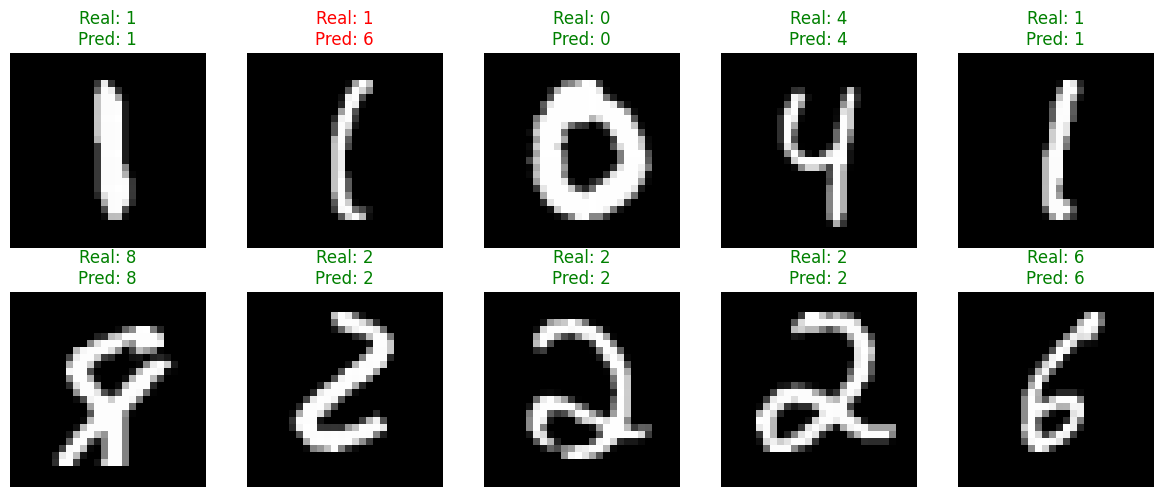

In [80]:

# 6. VISUALIZACIÓN DE RESULTADOS
# Vamos a sacar 10 imágenes al azar para verificar visualmente si acierta.
plt.figure(figsize=(12, 5))
indices_azar = np.random.choice(len(X_test), 10)

for i, idx in enumerate(indices_azar):
    # Re-formateamos el vector de 784 píxeles a una imagen de 28x28
    imagen = X_test[idx].reshape(28, 28)
    real = y_test[idx]
    predicho = y_pred[idx]
    
    # Si acertó, título verde; si falló, título rojo
    color_titulo = 'green' if real == predicho else 'red'
    
    plt.subplot(2, 5, i + 1)
    plt.imshow(imagen, cmap='gray')
    plt.title(f"Real: {real}\nPred: {predicho}", color=color_titulo)
    plt.axis('off') # Ocultar los ejes para que se vea limpio

plt.tight_layout()
plt.show()

In [83]:
# =========================================================
# CLASIFICACIÓN MNIST CON SVC (SUPPORT VECTOR CLASSIFIER)
# =========================================================

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# 1. CARGA DE DATOS
print("Cargando imágenes de MNIST...")
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"]

# 2. ESCALADO Y MUESTREO
# Normalizamos los valores de los píxeles para que estén entre 0 y 1
X = X / 255.0

# Tomamos una muestra de 10,000 imágenes para que sea rápido
# Si tienes una PC potente, puedes comentar estas dos líneas
X_sample = X[:10000]
y_sample = y[:10000]

# 3. DIVISIÓN DE DATOS
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

# 4. CONFIGURACIÓN Y ENTRENAMIENTO
# Usamos el kernel 'rbf' que es el estándar para datos complejos
print("Entrenando el modelo SVC (esto puede tardar un poco más que el árbol)...")
modelo_svm = SVC(kernel='rbf',degree=3,coef0=1,C=1, gamma=2)
modelo_svm.fit(X_train, y_train)

# 5. PREDICCIÓN Y EVALUACIÓN
y_pred = modelo_svm.predict(X_test)
precisión = accuracy_score(y_test, y_pred)

print(f"\n¡Entrenamiento finalizado!")
print(f"Precisión del SVC: {precisión * 100:.2f}%")

Cargando imágenes de MNIST...
Entrenando el modelo SVC (esto puede tardar un poco más que el árbol)...

¡Entrenamiento finalizado!
Precisión del SVC: 10.80%


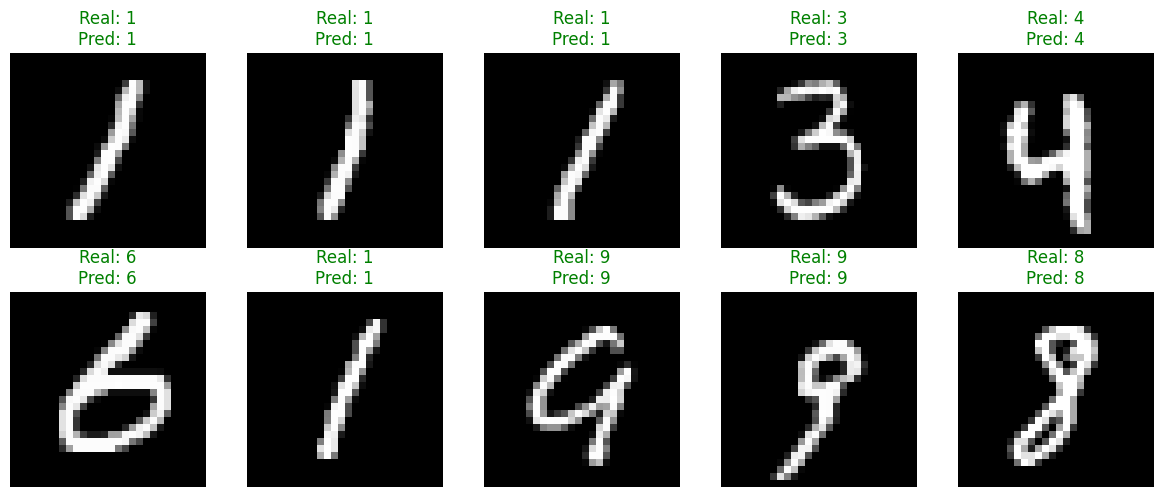

In [82]:

# 6. VISUALIZACIÓN DE RESULTADOS
plt.figure(figsize=(12, 5))
indices_azar = np.random.choice(len(X_test), 10)

for i, idx in enumerate(indices_azar):
    imagen = X_test[idx].reshape(28, 28)
    real = y_test[idx]
    predicho = y_pred[idx]
    
    color_titulo = 'green' if real == predicho else 'red'
    
    plt.subplot(2, 5, i + 1)
    plt.imshow(imagen, cmap='gray')
    plt.title(f"Real: {real}\nPred: {predicho}", color=color_titulo)
    plt.axis('off')

plt.tight_layout()
plt.show()